In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
%matplotlib inline

In diesem Notebook wird das das dynamische lineare Einspurmodell implementiert.

![schema](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/EinspurKinematik.png/370px-EinspurKinematik.png)

![dgl-system](assets/dgl-system.png)

für die DGL setzen wir:

\begin{equation}
\dot\phi = \omega
\end{equation}

In [12]:
c_v = 0.1
c_h = 0.1
m = 1000
l_v = 2
l_h = 2
J = 42

Input function:

In [47]:
def δ_v(t):
    f = 0.5
    a_rad = 1*2*np.pi/360
    return a_rad*np.sin(2*np.pi*f*t)

In [48]:
t = np.linspace(0, 30, 10000)

No handles with labels found to put in legend.


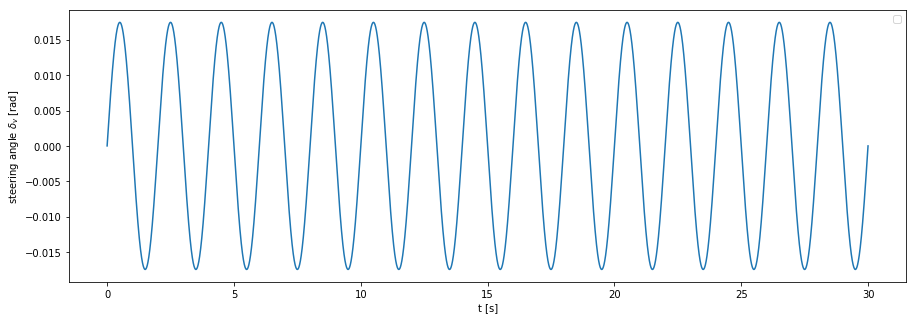

In [50]:
plt.figure(figsize=(15,5))
plt.plot(t, δ_v(t))
plt.xlabel("t [s]")
plt.ylabel("steering angle $δ_v$ [rad]")
plt.legend()

In [51]:
def transition_model(t, state):
    v, β, 𝜔 = state
    v_dot = c_v/m*δ_v(t) + c_v*l_v/(m*v)*δ_v(t)*𝜔 - c_v/m*δ_v(t)**2
    β_dot = - (c_v+c_h)/(m*v)*β + (-1 + (c_h*l_h-c_v*l_v)/(m*v**2))*𝜔 + c_v/(m*v)*δ_v(t)
    𝜔_dot = (c_h*l_h-c_v*l_v)/J*β - (c_h*l_h**2 + c_v*l_v**2)/(J*v)*𝜔 + c_v*l_v/J*δ_v(t)
    return np.r_[v_dot, β_dot, 𝜔_dot]

In [52]:
initial_state = np.r_[33.3, 0, 0]

In [53]:
integral_range = [0, 30]

In [54]:
eval_times = np.linspace(0, 30, 10000)

In [57]:
result = solve_ivp(transition_model, integral_range, y0=initial_state, t_eval=t)

In [56]:
result

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 164
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.00030003e-03, 6.00060006e-03, ...,
       2.99939994e+01, 2.99969997e+01, 3.00000000e+01])
 t_events: None
        y: array([[ 3.33000000e+01,  3.33000000e+01,  3.33000000e+01, ...,
         3.32999995e+01,  3.32999995e+01,  3.32999995e+01],
       [ 0.00000000e+00, -4.34182899e-13, -6.43792472e-12, ...,
        -7.95167072e-04, -7.95158488e-04, -7.95149814e-04],
       [ 0.00000000e+00,  1.17517856e-09,  4.70060714e-09, ...,
        -2.89486516e-06, -2.89945558e-06, -2.90098739e-06]])